# Concepção

Como proposta para o desafio apresentado na disciplina de "Bootcamp" do curso de "Data Science e Machine Leraning" da turma 6IA da Faculdade de administração e informática paulista (FIAP), elaboramos o seguinte material, que se propõe em construir um sistema de recomendação de investimentos.<BR>
A partir da apresentação do caso do cliente entendemos que a nossas premissas eram:
* Sistema de recomendação de investimentos
* Sem viés de recomendação
* Espaço para experimentação
* Bases estruturadas de facil manuseio

Para responder o desafio, pensamos na seguinte proposta:
* 4 algoritimos funcionando de forma interligada, sendo 3 recomendadores e 1 ranking
* Algoritimo 1: Através do perfil do cliente, definir quais são os produtos mais comprados dado aquele perfil (Clusterização de perfis)
* Algoritimo 2: Analise de cesta por regras combinatórias, definir quais produtos são mais comprados após outro (Como Apriori, FPgrowth)
* Algoritimo 3: Analise de afinidade de produtos através de matriz combinatória, definindo quais produtos são mais próximos um dos outros (Como KNN)
* Algoritimo 4: Ranking de produtos, que avalia de forma agnóstica todos os produtos, recomenda o melhor de acordo com a saida dos outros 3 algoritimos levando em consideração um mix de tipos de investimentos para sempre diversificar a carteira do cliente

### Sobre o processamento

* Cada um dos algoritimos recomendadores, cria uma lista de recomendações (desconsiderando os produtos que aquele cliente ja possui) que posteriormente são agregadas.
* Esse agregado é então submetido a um ranking, que dado parametros iniciais, devolve uma quantidade x de recomendações divididas por um mix de tipos de produtos

---

## Códificação - Imports

Todos os imports do projeto são feitos nesse bloco afim de diminuir o tamanho do código em pontos mais complexos e facilitar o entendimento do código

In [153]:
# Imports basicos
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# Responsaveis por operacionalizar as operacoes de analise

# Imports de modelos
import graphviz
import apyori
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from mlxtend.frequent_patterns import apriori, association_rules 
# Responsaveis por aplicar os modelos estatisticos

---

## Codificação - Pré processamento

Para que a nossa ideia se materialize o primeiro ponto é o import do dataset.
* No nosso projeto utilizamos apenas o Dataset-1.csv, que contem todas as informações do cliente, e os produtos que o mesmo possui
* Para facilitar o desenvolvimento criamos um dataset apenas com os clientes

In [154]:
%%time

df_clientes = pd.read_csv('./datasets/CLIENTES.csv',encoding = 'UTF-8')
df_clientes.fillna(0)

df_produtos = pd.read_csv('./datasets/PRODUTOS.csv',encoding = 'UTF-8')
df_produtos.fillna(0)

df_compras = pd.read_csv('./datasets/Dataset-1.csv',encoding = 'UTF-8')
df_compras.fillna(0)

print('ok')

ok
Wall time: 1.16 s


<string>:2: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.


In [155]:
# Trabalhando no dataset
# Criando Label Encoders
le1 = preprocessing.LabelEncoder()
df_clientes['EstadoCivil_enc'] = le1.fit_transform(df_clientes.EstadoCivil) # EstadoCivil

le2= preprocessing.LabelEncoder()
df_clientes['BillingCity_enc'] = le2.fit_transform(df_clientes.BillingCity.astype(str)) # BillingCity

le3 = preprocessing.LabelEncoder()
df_clientes['Resposta11_enc'] = le3.fit_transform(df_clientes.Resposta11.astype(str)) # Resposta11

le4 = preprocessing.LabelEncoder()
df_clientes['Resposta21_enc'] = le4.fit_transform(df_clientes.Resposta21.astype(str)) # Resposta21

le5 = preprocessing.LabelEncoder()
df_clientes['Resposta31_enc'] = le5.fit_transform(df_clientes.Resposta31.astype(str)) # Resposta31

le6 = preprocessing.LabelEncoder()
df_clientes['Resposta41_enc'] = le6.fit_transform(df_clientes.Resposta41.astype(str)) # Resposta41

le7 = preprocessing.LabelEncoder()
df_clientes['Resposta51_enc'] = le7.fit_transform(df_clientes.Resposta51.astype(str)) # Resposta51

le8 = preprocessing.LabelEncoder()
df_clientes['Resposta52_enc'] = le8.fit_transform(df_clientes.Resposta52.astype(str)) # Resposta52

le9 = preprocessing.LabelEncoder()
df_clientes['Resposta53_enc'] = le9.fit_transform(df_clientes.Resposta53.astype(str)) # Resposta53

le10 = preprocessing.LabelEncoder()
df_clientes['Resposta54_enc'] = le10.fit_transform(df_clientes.Resposta54.astype(str)) # Resposta54

le11 = preprocessing.LabelEncoder()
df_clientes['Resposta55_enc'] = le11.fit_transform(df_clientes.Resposta55.astype(str)) # Resposta55

le12 = preprocessing.LabelEncoder()
df_clientes['Resposta55_enc'] = le12.fit_transform(df_clientes.Resposta55.astype(str)) # Resposta55

le13 = preprocessing.LabelEncoder()
df_clientes['Resposta56_enc'] = le13.fit_transform(df_clientes.Resposta56.astype(str)) # Resposta56

le14 = preprocessing.LabelEncoder()
df_clientes['Resposta57_enc'] = le14.fit_transform(df_clientes.Resposta57.astype(str)) # Resposta57

le15 = preprocessing.LabelEncoder()
df_clientes['Resposta58_enc'] = le15.fit_transform(df_clientes.Resposta58.astype(str)) # Resposta58

le16 = preprocessing.LabelEncoder()
df_clientes['Resposta54_enc'] = le16.fit_transform(df_clientes.Resposta54.astype(str)) # Resposta54

le17 = preprocessing.LabelEncoder()
df_clientes['Resposta61_enc'] = le17.fit_transform(df_clientes.Resposta61.astype(str)) # Resposta61

le18 = preprocessing.LabelEncoder()
df_clientes['Resposta62_enc'] = le18.fit_transform(df_clientes.Resposta62.astype(str)) # Resposta62

le19 = preprocessing.LabelEncoder()
df_clientes['Resposta63_enc'] = le19.fit_transform(df_clientes.Resposta63.astype(str)) # Resposta63

le20 = preprocessing.LabelEncoder()
df_clientes['Resposta64_enc'] = le20.fit_transform(df_clientes.Resposta64.astype(str)) # Resposta64

le21 = preprocessing.LabelEncoder()
df_clientes['Resposta65_enc'] = le21.fit_transform(df_clientes.Resposta65.astype(str)) # Resposta65

le22 = preprocessing.LabelEncoder()
df_clientes['Resposta66_enc'] = le22.fit_transform(df_clientes.Resposta66.astype(str)) # Resposta66

le23 = preprocessing.LabelEncoder()
df_clientes['Resposta67_enc'] = le23.fit_transform(df_clientes.Resposta67.astype(str)) # Resposta67

le24 = preprocessing.LabelEncoder()
df_clientes['Resposta68_enc'] = le24.fit_transform(df_clientes.Resposta68.astype(str)) # Resposta68

le25 = preprocessing.LabelEncoder()
df_clientes['Resposta71_enc'] = le25.fit_transform(df_clientes.Resposta71.astype(str)) # Resposta71

le26 = preprocessing.LabelEncoder()
df_clientes['Resposta72_enc'] = le26.fit_transform(df_clientes.Resposta72.astype(str)) # Resposta72

le27 = preprocessing.LabelEncoder()
df_clientes['Resposta73_enc'] = le27.fit_transform(df_clientes.Resposta73.astype(str)) # Resposta73

le28 = preprocessing.LabelEncoder()
df_clientes['Resposta74_enc'] = le28.fit_transform(df_clientes.Resposta74.astype(str)) # Resposta74

le29 = preprocessing.LabelEncoder()
df_clientes['Resposta75_enc'] = le29.fit_transform(df_clientes.Resposta75.astype(str)) # Resposta75

le30 = preprocessing.LabelEncoder()
df_clientes['Resposta81_enc'] = le30.fit_transform(df_clientes.Resposta81.astype(str)) # Resposta81

le31 = preprocessing.LabelEncoder()
df_clientes['Resposta91_enc'] = le31.fit_transform(df_clientes.Resposta91.astype(str)) # Resposta91


---

## Codificação - Verificando recomendacoes por perfis de cluster

Nosso dataset de treino para clusterização, vai ser composta de variaveis de score, idade, estado civil e perfil de investidor

In [156]:
# Criando o dataset de treino
x = df_clientes[['EstadoCivil_enc','SCORE_RISCO','SCORE_OBJETIVOS', 'SCORE_SITUACAO_FINANCEIRA', 'Idade', 'NIVEL_CONHECIMENTO_ATUAL', 'SCORE_NIVEL_CONHECIMENTO', 'PERFIL_INVESTIDOR']]
x = x.fillna(0)

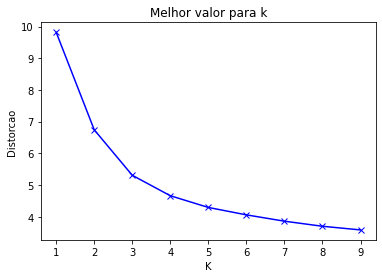

In [157]:
# Apenas a titulo informativo, segue o metodo utilizado para definir o numero de clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    
# Plot do elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distorcao')
plt.title('Melhor valor para k')
plt.show()

In [158]:
# Com o elbow, vamos seguir com 5 clusters
kmeansModel = KMeans(5).fit(x)
df_clientes['CLUSTER'] = kmeansModel.predict(x)
# Contagem de clientes por cluster
df_clientes[['Id','CLUSTER']].groupby(['CLUSTER']).count()

,Id
CLUSTER,
0,3366
1,3551
2,662
3,1734
4,4191


In [159]:
# Agora todos os clientes com suas compras e o seu cluster
df_comprasCluster = pd.merge(df_compras, df_clientes[['CLUSTER','Id']], left_on='Id', right_on='Id')
df_comprasCluster.head()

,Unnamed: 0,Id,Idade,EstadoCivil,BillingCity,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,...,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo,Status,ProdutoId,CLUSTER
0,0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,1.0,2,1300.0,6000.0,...,NaN,Renda Fixa,30.0,NaN,0.0,0.37005375,1.0,Efetivada,a0W6A000009GZdgUAG,4
1,1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,NaN,Renda Fixa,150.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG,1
2,2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,NaN,Renda Fixa,50.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG,1
3,3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,NaN,Renda Fixa,60.0,NaN,0.0,0.13178136,1.0,Efetivada,a0W6A000009GZdgUAG,1
4,4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,NaN,Renda Fixa,40.0,NaN,0.0,0.15076414,1.0,Efetivada,a0W6A000009GZdgUAG,1


In [327]:
# Criando lista de produtos por cluster
cluster0 = df_comprasCluster[df_comprasCluster['CLUSTER']==0]
cluster0 = cluster0[['ProdutoId','CLUSTER','NomeDoProduto','Id']].groupby(['ProdutoId','CLUSTER','NomeDoProduto']).count().sort_values(by=['Id'], ascending=False).reset_index()

cluster1 = df_comprasCluster[df_comprasCluster['CLUSTER']==1]
cluster1 = cluster1[['ProdutoId','CLUSTER','NomeDoProduto','Id']].groupby(['ProdutoId','CLUSTER','NomeDoProduto']).count().sort_values(by=['Id'], ascending=False).reset_index()

cluster2 = df_comprasCluster[df_comprasCluster['CLUSTER']==2]
cluster2 = cluster2[['ProdutoId','CLUSTER','NomeDoProduto','Id']].groupby(['ProdutoId','CLUSTER','NomeDoProduto']).count().sort_values(by=['Id'], ascending=False).reset_index()

cluster3 = df_comprasCluster[df_comprasCluster['CLUSTER']==3]
cluster3 = cluster3[['ProdutoId','CLUSTER','NomeDoProduto','Id']].groupby(['ProdutoId','CLUSTER','NomeDoProduto']).count().sort_values(by=['Id'], ascending=False).reset_index()

cluster4 = df_comprasCluster[df_comprasCluster['CLUSTER']==4]
cluster4 = cluster4[['ProdutoId','CLUSTER','NomeDoProduto','Id']].groupby(['ProdutoId','CLUSTER','NomeDoProduto']).count().sort_values(by=['Id'], ascending=False).reset_index()

---

## Codificação - Verificando recomendacoes regras de combinação

In [328]:
# Codificando o id do produto e do cliente
le32 = preprocessing.LabelEncoder()
df_compras['Id_enc'] = le32.fit_transform(df_compras.Id.astype(str))

le33 = preprocessing.LabelEncoder()
df_compras['ProdutoId_enc'] = le33.fit_transform(df_compras.ProdutoId.astype(str))

# Dataframe com as compras por cliente
cestas = df_compras.groupby('Id_enc')['ProdutoId_enc'].agg(lambda x:list(x)).reset_index()
cestas['quantidade de itens'] = cestas['ProdutoId_enc'].apply(lambda x: len(x))
cestas.sort_values(by = 'quantidade de itens', ascending=False).head()

,Id_enc,ProdutoId_enc,quantidade de itens
8354,8354,"[585, 519, 611, 837, 129, 519, 519, 585, 585, ...",175
8299,8299,"[431, 611, 431, 619, 608, 530, 431, 431, 431, ...",98
7331,7331,"[585, 585, 611, 129, 619, 759, 431, 530, 585, ...",81
853,853,"[431, 431, 431, 497, 435, 431, 326, 585, 431, ...",73
6799,6799,"[84, 585, 153, 224, 810, 836, 63, 714, 710, 32...",64


In [329]:
# Aplicando algoritimo apriori
results = list(apyori.apriori(cestas['ProdutoId_enc'], min_support=0.004))

In [330]:
# Calculando suporte de cada conjunto de itens
support = []
itens = []
for n in tqdm(range(len(results))):
    lista_de_items = list(results[n].items)
    support.append(results[n].support)
    itens.append(lista_de_items)

tabela_de_suportes = pd.DataFrame()
tabela_de_suportes['itens'] = itens
tabela_de_suportes['itens'] = tabela_de_suportes['itens'].apply(lambda x: str(x))
tabela_de_suportes['support'] = support

100%|███████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 85270.47it/s]


In [331]:
# Calculando confidence e antecedents
consequents = []
antecedents = []
confidence = []
lift = []
for n in tqdm(range(len(results))):
    for resultado in results[n].ordered_statistics:
        antecedents.append(resultado.items_base)
        consequents.append(resultado.items_add)
        confidence.append(resultado.confidence)
        lift.append(resultado.lift)

tabela_apriori = pd.DataFrame()
tabela_apriori['antecedents'] = antecedents
tabela_apriori['consequents'] = consequents
tabela_apriori['confidence'] = confidence
tabela_apriori['lift'] = lift

100%|███████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 85188.97it/s]


In [332]:
tabela_apriori.tail()

,antecedents,consequents,confidence,lift
190,(608),"(619, 607)",0.058883,6.748423
191,(619),"(608, 607)",0.113503,18.336878
192,"(608, 607)",(619),0.698795,18.336878
193,"(619, 607)",(608),0.495726,6.748423
194,"(608, 619)",(607),0.522523,31.993171


---

## Codificação - Produtos vizinhos

---

## Codificação - Criação de Ranking de melhores produtos

Para realizar esse ranking, vamos utilizar um processo simples, onde vamos transformar todos os atributos de um produto em um valor de 0 a 1 (outliers recebem 1) em relação a outros produtos.
E após todos os atributos serem classificados com valores de 0 a 1, vamos criar uma média dos valores entre todos os atributos classificados de um produto, dessa forma teremos os produtos que tem atributos na média melhores.

Esse ranking no futuro, pode ser melhorado para incluir pesos em cada atributo, adicionar atributos de preferencia ou até mesmo criar um ranking exclusivo de acordo com cada cliente através de processos de AI-to-rank. Como estamos trabalhando em um mvp, vamos nos ater a um modelo mais simples afim de provar a eficacia do produto.

In [333]:
df_produtos.head()

,NomeDoProduto,ProdutoId,FamiliaCarteira,QUANTIDADE_INVESTIDORES,MEDIA_RISCO,MEDIA_RENTABILIDADE,MEDIA_RENTABILIDADE_12MESES,MEDIA_INVESTIMENTO_ANUAL,MEDIA_VALOR_MINIMO_APLICACAO,MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL,QUANTIDADE_INVESTIDORES_rank,MEDIA_RISCO_rank,MEDIA_RENTABILIDADE_rank,MEDIA_RENTABILIDADE_12MESES_rank,MEDIA_INVESTIMENTO_ANUAL_rank,MEDIA_VALOR_MINIMO_APLICACAO_rank,MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL_rank,PROD_RANK
0,PI SELIC RF SIMPLES FI,a0W6A000009GZdgUAG,Renda Fixa,13413,1.000000,0.205211,0.000000,2172.599342,30.000000,30.000000,0.020175,0.0,0.043940,0.020175,0.020175,0.020175,0.020175,0.020688
1,JOJO WACHSMANN - VITREO,a0W6A000009R6mvUAC,Renda Fixa,1061,4.000000,0.668730,0.000000,9130.542479,1000.000000,100.000000,0.065746,0.0,0.143190,0.065746,0.065746,0.065746,0.065746,0.067417
2,SAM JURO REAL RF FIC FI,a0W6A000008FwYQUA0,Renda Fixa,2528,2.994858,0.363075,11.488018,503.265439,30.077008,30.015823,0.035695,0.0,0.077742,0.035695,0.035695,0.035695,0.035695,0.036603
3,RENATO SANTANIELLO - SANTANDER PRIVATE,a0W6A000009L0FgUAK,Renda Fixa,3827,4.000000,0.351562,0.000000,558.438223,30.000000,30.000000,0.034564,0.0,0.075277,0.034564,0.034564,0.034564,0.034564,0.035442
4,SAM RENDA FIXA LONGO PRAZO FIC FI,a0W6A000009IJjgUAG,Renda Fixa,265,3.000000,0.184425,6.688629,229.840868,30.000000,30.000000,0.018132,0.0,0.039489,0.018132,0.018132,0.018132,0.018132,0.018592


O metodo a seguir, e responsavel por analisar uma coluna do dataframe e entao aplicar uma versão customizada do min max scaler:
* A formula do min max scaler é: X - menor_valor/maior_valor - menor valor
* Nossa customizacao, implica em primeiramente encontrar os outliers, que são regidos por média + 1.5*desvio padrao (1.5 pode ser customizado)
* Valores maiores que o maior outlier, recebem o maior valor possivel, regido por média + 1.5*desvio
* Valores menores que o menor outlier, recebem o menor valor possivel, regido por média - 1.5*desvio
* Caso o menor valor seja inferior a 0, o mesmo recebe 0 automaticamente
* Após recompor a lista com as regras definidas, e deixar o processo mais robusto contra outliers, aplicamos a formula padrao do min max scaler

In [334]:
def bracaRankingScaler(lista, inverse_rank = False, treshold = 1.5, debug = False):
    desvio = np.std(lista) # Desvio padrao
    media = np.mean(lista) # Media
    maximus = media + (treshold * desvio) # Maior valor aceito, 1.5 para valores conservadores, 2.5 para valores mais abrangentes
    minimus = media - (treshold * desvio) # Menor valor aceito, 1.5 para valores conservadores, 2.5 para valores mais abrangentes
    if minimus <= 0: minimus = 0 # Se o menor valor aceito for menor que zero, a variavel recebe 0
        
    lista_process = [] # Lista que amarzena os resultados dos processamentos de menor e maior valor para o ranking
    
    for item in escalando:
        if item >= maximus:
            lista_process.append(maximus)
        elif item <= minimus:
            lista_process.append(minimus)
        elif math.isnan(item):
            lista_process.append(minimus)
        else:
            lista_process.append(item)
    # Substitui outliers por valores dentro de uma regua aceitavel

    devolucao = [] # Lista que o metodo retorna, com os valores efetivamente escalados
    
    maior_valor = max(lista_process)# Obtem o maior valor da lista
    menor_valor = min(lista_process)# Obtem o menor valor da lista
    
    for item in lista_process:
        valor = (item-menor_valor)/(maior_valor-menor_valor)
        if inverse_rank: valor = (valor -1) *-1 # Caso o valor seja um ranking de natureza negativa
        devolucao.append(valor)
    # Aplica a formula do min max scaler e adiciona o valor na lista
    
    if debug: print(f"""Desv:{desvio}| Med:{media}| Max_outlier:{maximus}| Min_outlier:{minimus}| Maior na lista:{maior_valor}| Menor na lista{menor_valor} """) # Linha de debug de valores calculados
    
    return devolucao

In [335]:
# --- Criando ranks para cada um dos atributos 'rankeaveis' ---
df_produtos['QUANTIDADE_INVESTIDORES_rank'] = bracaRankingScaler(df_produtos['QUANTIDADE_INVESTIDORES'])
df_produtos['MEDIA_RISCO_rank'] = bracaRankingScaler(df_produtos['MEDIA_RISCO'])
df_produtos['MEDIA_RENTABILIDADE_rank'] = bracaRankingScaler(df_produtos['MEDIA_RENTABILIDADE'])
df_produtos['MEDIA_RENTABILIDADE_12MESES_rank'] = bracaRankingScaler(df_produtos['MEDIA_RENTABILIDADE_12MESES'])
df_produtos['MEDIA_INVESTIMENTO_ANUAL_rank'] = bracaRankingScaler(df_produtos['MEDIA_INVESTIMENTO_ANUAL'])
df_produtos['MEDIA_VALOR_MINIMO_APLICACAO_rank'] = bracaRankingScaler(df_produtos['MEDIA_VALOR_MINIMO_APLICACAO'])
df_produtos['MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL_rank'] = bracaRankingScaler(df_produtos['MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL'])
# -------------------------------------------------------------

# --- Criando ranking por cada um dos atributos do produto ---
df_produtos['PROD_RANK'] = df_produtos[['QUANTIDADE_INVESTIDORES_rank', 'MEDIA_RISCO_rank', 'MEDIA_RENTABILIDADE_rank', 'MEDIA_RENTABILIDADE_12MESES_rank', 'MEDIA_INVESTIMENTO_ANUAL_rank', 'MEDIA_VALOR_MINIMO_APLICACAO_rank', 'MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL_rank']].mean(axis=1)
# ------------------------------------------------------------

df_produtos.head(4)

,NomeDoProduto,ProdutoId,FamiliaCarteira,QUANTIDADE_INVESTIDORES,MEDIA_RISCO,MEDIA_RENTABILIDADE,MEDIA_RENTABILIDADE_12MESES,MEDIA_INVESTIMENTO_ANUAL,MEDIA_VALOR_MINIMO_APLICACAO,MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL,QUANTIDADE_INVESTIDORES_rank,MEDIA_RISCO_rank,MEDIA_RENTABILIDADE_rank,MEDIA_RENTABILIDADE_12MESES_rank,MEDIA_INVESTIMENTO_ANUAL_rank,MEDIA_VALOR_MINIMO_APLICACAO_rank,MEDIA_VALOR_MINIMO_APLICACAO_ADICIONAL_rank,PROD_RANK
0,PI SELIC RF SIMPLES FI,a0W6A000009GZdgUAG,Renda Fixa,13413,1.000000,0.205211,0.000000,2172.599342,30.000000,30.000000,0.020175,0.0,0.043940,0.020175,0.020175,0.020175,0.020175,0.020688
1,JOJO WACHSMANN - VITREO,a0W6A000009R6mvUAC,Renda Fixa,1061,4.000000,0.668730,0.000000,9130.542479,1000.000000,100.000000,0.065746,0.0,0.143190,0.065746,0.065746,0.065746,0.065746,0.067417
2,SAM JURO REAL RF FIC FI,a0W6A000008FwYQUA0,Renda Fixa,2528,2.994858,0.363075,11.488018,503.265439,30.077008,30.015823,0.035695,0.0,0.077742,0.035695,0.035695,0.035695,0.035695,0.036603
3,RENATO SANTANIELLO - SANTANDER PRIVATE,a0W6A000009L0FgUAK,Renda Fixa,3827,4.000000,0.351562,0.000000,558.438223,30.000000,30.000000,0.034564,0.0,0.075277,0.034564,0.034564,0.034564,0.034564,0.035442


---

## Codificação - Respondendo recomendacoes

Nosso metodo de recomendacoes recebe:
* Perfil do cliente
* Ultimo produto comprado pelo cliente
* Lista com itens que não devem ser exibidos como recomendacao para aquele usuario (Caso ele ja possua esses produtos)
* Quantas recomendacoes estao sendo requisitadas
* Parametro escondido 1: Percentual de recomendacoes renda fixa ( O resto retornara renda variavel )
* Parametro escondido 2: Permite utilizar apenas um metodo de recomendacao ( Util para testes A+B)

In [456]:
def recomendaPi(perfil, ultimaCompra, recs, blackList = [], renda_fixa = 0.5, motor = 'todos', debug = False):
    """Para que esse metodo funcione corretamente e necessario que os parametros de inicio sejam exatamente:
    perfil = Um dataframe com uma linha que seja a exata replica do dataframe de clientes aqui importado
    ultimaCompra = ID do ultimo produto comprado pelo cliente
    recs = numero inteiro de 1 a 20
    blackList = Lista com produtos que nao podem ser recomendados para o usuario
    renda_fixa = numero de 0 a 0.9, que inidica o percentual de recomendacoes em renda fixa, o restante ate 1 e o percentual de recomendacoes de renda variavel
    motor = admite: todos, cluster, combinacao, proximidade; onde cada um dos parametros se refere a um tipo especifico de algoritimo ou todos. Em caso de parametro nao cadastrado, todos é utilizado"""
    
    # Lista que recebe todas as recomendacoes
    listaRecs = []
    
    # Dataframe utilizado para processamentos diversos
    df2 = []
    
    # Tratamento inicial de parametros de entrada:
    blackList.append(ultimaCompra) # A ultima compra não pode ser recomendada novamente
    if renda_fixa >=0.9: renda_fixa = 0.9
    renda_variavel = (renda_fixa -1)*-1

    if debug: print(f"""DEBUG| Processamento de recomendacoes iniciado para...
Perfil de usuario: \n{perfil}
ID da ultima compra: {ultimaCompra}
Solicitando {recs} recomendacoes
Com a seguinte blackList: {blackList}
Percentual de retorno de produtos renda fixa é: {renda_fixa*100}%
Percentual de retorno de produtos renda variavel é: {renda_variavel*100}%
Motor de recomendacao = {motor}
Iniciando...
""")
    
    # Encontrando cluster do perfil
    perfil['EstadoCivil'] = le1.transform(perfil['EstadoCivil'])
    cluster = kmeansModel.predict(perfil)
    perfil['CLUSTER'] = kmeansModel.predict(perfil)
    
    # Armazenando lista de recomendacoes para o cluster
    listaRecs = pd.DataFrame(columns = ['ProdutoId'],index=[0])
    if cluster[0] == '0':
        df2 = pd.DataFrame(cluster0['ProdutoId'])
        if debug: print("Recomendacoes para cluster 0 - ok")
    if cluster[0] == '1':
        df2 = pd.DataFrame(cluster1['ProdutoId'])
        if debug: print("Recomendacoes para cluster 1 - ok")
    if cluster[0] == '2':
        df2 = pd.DataFrame(cluster2['ProdutoId'])
        if debug: print("Recomendacoes para cluster 2 - ok")
    if cluster[0] == '3':
        df2 = pd.DataFrame(cluster3['ProdutoId'])
        if debug: print("Recomendacoes para cluster 3 - ok")
    if cluster[0] == '4':
        df2 = pd.DataFrame(cluster4['ProdutoId'])
        if debug: print("Recomendacoes para cluster 4 - ok")
    listaRecs = df2.append(listaRecs)
    
    # Verificando recomendacoes apriori
    apriRec = le33.transform([ultimaCompra])[0]
    
    listaApri = []

    for index, row in tabela_apriori.iterrows():
         for antecedente in row.antecedents:
                if antecedente == apriRec:
                    for consequente in row.consequents:
                        listaApri.append(le33.inverse_transform([consequente])[0])
    
    
    
    return listaApri

Nesse bloco vamos declarar as variaveis de entrada do sistema

In [457]:
perfil = pd.DataFrame({'EstadoCivil': ['M'],
                      'SCORE_RISCO':[2.0],
                      'SCORE_OBJETIVOS':[2.0],
                      'SCORE_SITUACAO_FINANCEIRA':[1.0],
                      'Idade':[30.0],
                      'NIVEL_CONHECIMENTO_ATUAL':[1.0],
                      'SCORE_NIVEL_CONHECIMENTO':[1.0],
                      'PERFIL_INVESTIDOR':[2.0],
                    }) #........................................................... Essas serao as variaveis utilizadas para descobrir o cluster do cliente

ultimaCompra = 'a0W6A000009GZdgUAG' #.............................................. O ID da ultima compra do cliente
recs = 5 #......................................................................... Numero de recomendacoes que eu quero como resposta
blackList = ['a0W6A000009R6mvUAC','a0W6A000008FwYQUA0','a0W6A000009L0FgUAK'] #..... Itens que eu quero como blacklist
renda_fixa = 0.5 #................................................................. Quantidade de produtos em renda fixa
motor = 'todos' #.................................................................. Qual motor sera utilizado para gerar recomendacoes

In [458]:
teste = recomendaPi(perfil, ultimaCompra, recs, blackList, renda_fixa, motor,debug = True)

DEBUG| Processamento de recomendacoes iniciado para...
Perfil de usuario: 
  EstadoCivil  SCORE_RISCO  SCORE_OBJETIVOS  SCORE_SITUACAO_FINANCEIRA  Idade  \
0           M          2.0              2.0                        1.0   30.0   

   NIVEL_CONHECIMENTO_ATUAL  SCORE_NIVEL_CONHECIMENTO  PERFIL_INVESTIDOR  
0                       1.0                       1.0                2.0  
ID da ultima compra: a0W6A000009GZdgUAG
Solicitando 5 recomendacoes
Com a seguinte blackList: ['a0W6A000009R6mvUAC', 'a0W6A000008FwYQUA0', 'a0W6A000009L0FgUAK', 'a0W6A000009GZdgUAG']
Percentual de retorno de produtos renda fixa é: 50.0%
Percentual de retorno de produtos renda variavel é: 50.0%
Motor de recomendacao = todos
Iniciando...

